In [1]:
import pickle
with open('datasets/cedar_gpt_emb1536.pickle', 'rb') as handle:
    concept_emb_dict = pickle.load(handle)

In [2]:
from load_data import DataLoader
data_loader = DataLoader(use_graph_embeddings = False)  
data = data_loader.reidx_dat

assign reindex to concepts
data reindexing


100%|██████████| 788635/788635 [00:07<00:00, 108277.28it/s]


vocab_size: 14164


In [3]:
pat_c2i = data_loader.pat_c2i
concept_emb_dict = {k:concept_emb_dict[k] for k in pat_c2i}

In [7]:
chat_gpt_emb = []
for k, v in concept_emb_dict.items():
    chat_gpt_emb.append(v)
   
vocab_size = len(pat_c2i)+1
embedding_dim = 1536
hidden_size = 64
output_dim = 5

import torch
import numpy as np
chat_gpt_emb = torch.tensor(np.array(chat_gpt_emb))
padding_embedding = torch.zeros(1, embedding_dim)
final_embeddings = torch.cat((padding_embedding, chat_gpt_emb), dim=0)

In [8]:
from training import Training
import torch
torch.cuda.set_device(0)
device = torch.device('cuda')
training = Training(data, embedding_dim=embedding_dim, output_dim = output_dim, final_embeddings= final_embeddings, vocab_size = vocab_size, device = device)

create datasets
create trainloaders


In [9]:
best_model, train_loss, val_loss = training.training(lr = 0.0000001)

Epoch [1/500], Train Loss: 0.1039603325030887
Epoch [1/500], Val Loss: 0.026425140510982277
Epoch [2/500], Train Loss: 0.026903419188162876
Epoch [2/500], Val Loss: 0.025724873666842007
Epoch [3/500], Train Loss: 0.025440720096236807
Epoch [3/500], Val Loss: 0.025833879827812153
Epoch [4/500], Train Loss: 0.025005173462107295
Epoch [4/500], Val Loss: 0.024992659879765886
Epoch [5/500], Train Loss: 0.023095520294974043
Epoch [5/500], Val Loss: 0.021096962286515752
Epoch [6/500], Train Loss: 0.019681155383033583
Epoch [6/500], Val Loss: 0.018927341439264715
Epoch [7/500], Train Loss: 0.018332792929896247
Epoch [7/500], Val Loss: 0.01837126750886447
Epoch [8/500], Train Loss: 0.017827989053026298
Epoch [8/500], Val Loss: 0.018108508224274737
Epoch [9/500], Train Loss: 0.01754766652997737
Epoch [9/500], Val Loss: 0.017917583310282197
Epoch [10/500], Train Loss: 0.017328905163368657
Epoch [10/500], Val Loss: 0.017748138277831733
Epoch [11/500], Train Loss: 0.017136846444233644
Epoch [11/500

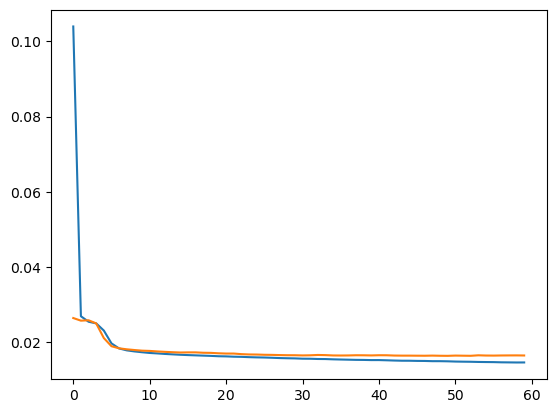

In [10]:
import matplotlib.pyplot as plt
plt.plot(train_loss)
plt.plot(val_loss)

In [11]:
import pickle

torch.save(best_model, 'model/tf_gpt1536_dx.pt')
with open('model/train_losses_tf_gpt1536_dx.pickle', 'wb') as handle:
    pickle.dump(train_loss, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/val_losses_tf_gpt1536_dx.pickle', 'wb') as handle:
    pickle.dump(val_loss, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
model = training.model

test_data = training.data_splits.test_data
_, _, test_ids = training.data_splits.split_ids()

from evaluate_performance import Evaluate
ev = Evaluate(test_data, test_ids, model, 'model/tf_gpt1536_dx.pt')

In [1]:
ev.sens_spec(specAt = 0.999)

In [11]:
rs = ev.raw_scores()

In [12]:
import pickle
with open('output/rs_tf_gpt1536_dx.pickle', 'wb') as handle:
    pickle.dump(rs, handle)